In [1]:
# Provides a way of using operating system dependent functionality. 
import os

# LibROSA provides the audio analysis
import librosa
# Need to implictly import from librosa
import librosa.display

# Import the audio playback widget
import IPython.display as ipd
from IPython.display import Image

# These are generally useful to have around
import numpy as np
import pandas as pd

# To build Neural Network and Create desired Model
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D #, AveragePooling1D
from keras.layers import Flatten, Dropout, Activation # Input, 
from keras.layers import Dense #, Embedding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [13]:
# Enable plot in the notebook

import matplotlib.pyplot as plt

In [16]:
data, sampling_rate = librosa.load('Dataset/anger/anger016.wav')
# To play audio this in the jupyter notebook
ipd.Audio('Dataset/anger/anger016.wav')

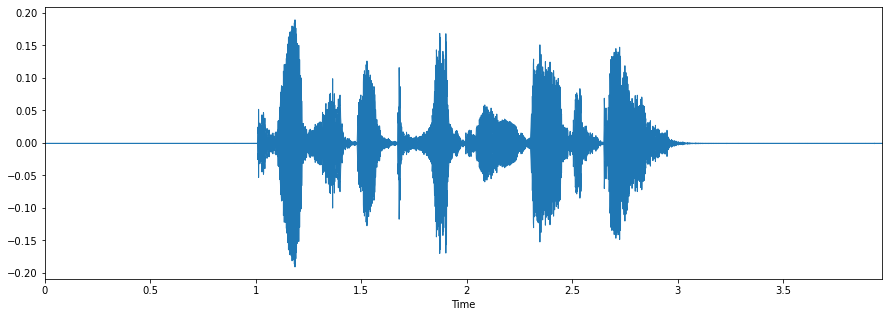

In [17]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Setting up the Basic Paramters

In [2]:
dataset_path = os.path.abspath('./Dataset')
destination_path = os.path.abspath('./')
# To shuffle the dataset instances/records
randomize = True
# for spliting dataset into training and testing dataset
split = 0.8
# Number of sample per second e.g. 16KHz
sampling_rate = 20000 
emotions=["anger","disgust","fear","happy","neutral", "depressed", "surprise"]


# Converting Dataset in CSV format
    it will be easier while performing operations on Dataset.


In [3]:
# import required libraries
import os
import sys
import csv
import librosa
import numpy as np
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
np.random.seed(42)

def create_meta_csv(dataset_path, destination_path):
    """Create a meta csv file given a dataset folder path of Audio.
    
    This function creates and saves a meta csv file named 'dataset_attr.csv' given a dataset folder path of audios.
    The file will contain audios and their labels. This file can be then used to make
    train, test and val splits, randomize them and load few of them (a mini-batch) in memory
    as required. The file is saved in dataset_path folder if destination_path is not provided.
    
    Args:
        dataset_path (str): Path to dataset folder
        destination_path (str): Destination to store meta file if None provided, it'll store file in dataset_path

    Returns:
        True (bool): Returns True if 'dataset_attr.csv' was created successfully else returns an exception
    """
    # Change dataset path accordingly
    DATASET_PATH = os.path.abspath(dataset_path)
    csv_path=os.path.join(destination_path, 'dataset_attr.csv')
    flist = []
    emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
    for root, dirs, files in os.walk(DATASET_PATH, topdown=False):
        for name in files:
            if (name.endswith('.wav')): 
                fullName = os.path.join(root, name)
                flist.append(fullName)

    split_format = str('/') if sys.platform=='linux' else str('\\')
    
    filenames=[]
    for idx,file in enumerate(flist):
        filenames.append(file.split(split_format)) 
        # print(filenames[idx])
    types=[]
    for idx,path in enumerate(filenames):
        types.append((flist[idx],emotions.index(path[-2]))) ##second last location has emotion name

    with open(csv_path, 'w') as f:
        writer = csv.writer(f)
        writer.writerows([("path","label")])
        writer.writerows(types)
    f.close()
    # change destination_path to DATASET_PATH if destination_path is None 
    if destination_path == None:
        destination_path = DATASET_PATH
        # write out as dataset_attr.csv in destination_path directory
        # if no error
    return True

def create_and_load_meta_csv_df(dataset_path, destination_path, randomize=True, split=None):
    """Create a meta csv file given a dataset folder path of audios and loads it as a pandas dataframe.

    This function creates and saves a meta csv file named 'dataset_attr.csv' given a dataset folder path of audios.
    The function will return pandas dataframes for the csv and also train and test splits if you specify a 
    fraction in split parameter.
    
    Args:
        dataset_path (str): Path to dataset folder
        destination_path (str): Destination to store meta csv file
        randomize (bool, optional): Randomize the csv records. Defaults to True
        split (double, optional): Percentage of train records. Defaults to None

    Returns:
        dframe (pandas.Dataframe): Returns a single Dataframe for csv if split is none, else returns more two Dataframes for train and test splits.
        train_set (pandas.Dataframe): Returns a Dataframe of length (split) * len(dframe)
        test_set (pandas.Dataframe): Returns a Dataframe of length (1 - split) * len(dframe)
    """
    if create_meta_csv(dataset_path, destination_path=destination_path):
        dframe = pd.read_csv(os.path.join(destination_path, 'dataset_attr.csv'))

    # shuffle if randomize is True or if split specified and randomize is not specified 
    # so default behavior is split
    if randomize == True or (split != None and randomize == None):
        # shuffle the dataframe here
        dframe=dframe.sample(frac=1).reset_index(drop=True)
        pass

    if split != None:
        train_set, test_set = train_test_split(dframe, split)
        return dframe, train_set, test_set 
    
    return dframe

def train_test_split(dframe, split_ratio):
    """Splits the dataframe into train and test subset dataframes.

    Args:
        split_ration (float): Divides dframe into two splits.

    Returns:
        train_data (pandas.Dataframe): Returns a Dataframe of length (split_ratio) * len(dframe)
        test_data (pandas.Dataframe): Returns a Dataframe of length (1 - split_ratio) * len(dframe)
    """
    # divide into train and test dataframes
    train_data= dframe.iloc[:int((split_ratio) * len(dframe)), :]
    test_data= dframe.iloc[int((split_ratio) * len(dframe)):,:]
    test_data=test_data.reset_index(drop=True) #reset index for test data
    return train_data, test_data

if __name__ == "__main__":
    # test config
    dataset_path =  os.path.dirname(os.getcwd())+'\codes\Dataset'
    print("dataset_path : ", dataset_path)
    destination_path = os.getcwd()
    classes = 7
    total_rows = 2556
    randomize = True
    clear = True

    # test_create_meta_csv()
    df, trn_df, tst_df = create_and_load_meta_csv_df(dataset_path, destination_path=destination_path, randomize=randomize, split=0.99)
    print(df.describe())
    print(trn_df.describe())
    print(tst_df.describe())

dataset_path :  C:\Users\shatrohan\Desktop\ML PROJECT\SAMPLE PROJ 3\codes\Dataset
             label
count  2556.000000
mean      2.877934
std       1.943418
min       0.000000
25%       1.000000
50%       3.000000
75%       5.000000
max       6.000000
             label
count  2530.000000
mean      2.877866
std       1.944796
min       0.000000
25%       1.000000
50%       3.000000
75%       5.000000
max       6.000000
           label
count  26.000000
mean    2.884615
std     1.840150
min     0.000000
25%     2.000000
50%     3.000000
75%     4.000000
max     6.000000


In [4]:
df, train_df, test_df = create_and_load_meta_csv_df(dataset_path, destination_path, randomize, split)

In [5]:
print('Dataset samples  : ', len(df),"\nTraining Samples : ", len(train_df),"\ntesting Samples  : ", len(test_df))

Dataset samples  :  2556 
Training Samples :  2044 
testing Samples  :  512


# Data Visualization


In [6]:
df.head()

,path,label
0,C:\Users\shatrohan\Desktop\ML PROJECT\SAMPLE P...,3
1,C:\Users\shatrohan\Desktop\ML PROJECT\SAMPLE P...,3
2,C:\Users\shatrohan\Desktop\ML PROJECT\SAMPLE P...,2
3,C:\Users\shatrohan\Desktop\ML PROJECT\SAMPLE P...,4
4,C:\Users\shatrohan\Desktop\ML PROJECT\SAMPLE P...,4


In [7]:
print("Actual Audio : ", df['path'][0])
print("Labels       : ", df['label'][0])

Actual Audio :  C:\Users\shatrohan\Desktop\ML PROJECT\SAMPLE PROJ 3\codes\Dataset\happy\happy313.wav
Labels       :  3


# Labels Assigned for a emotion :
0 : anger 

1 : disgust

2 : fear

3 : happy

4 : neutral

5 : sad

6 : surprise

In [8]:
unique_labels = train_df.label.unique()
unique_labels.sort()
print("unique labels in Emtion dataset : ")
print(*unique_labels, sep=', ')
unique_labels_counts = train_df.label.value_counts(sort=False)
print("\n\nCount of unique labels in Emtion dataset : ")
print(*unique_labels_counts,sep=', ')

unique labels in Emtion dataset : 
0, 1, 2, 3, 4, 5, 6


Count of unique labels in Emtion dataset : 
374, 192, 346, 354, 234, 347, 197


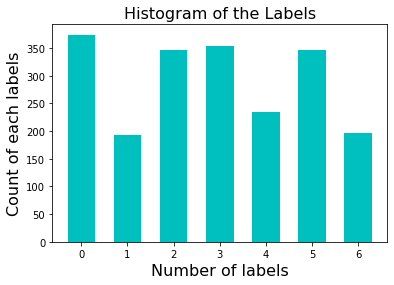

In [14]:
# Histogram of the classes
plt.bar(unique_labels, unique_labels_counts,align = 'center', width=0.6, color = 'c')
plt.xlabel('Number of labels', fontsize=16)
plt.xticks(unique_labels)
plt.ylabel('Count of each labels', fontsize=16)
plt.title('Histogram of the Labels', fontsize=16)
plt.show()

In [15]:
# feature_extracting
import librosa
import pandas as pd
import numpy as np

def get_audio_features(audio_path,sampling_rate):
    X, sample_rate = librosa.load(audio_path ,res_type='kaiser_fast',duration=2.5,sr=sampling_rate*2,offset=0.5)
    sample_rate = np.array(sample_rate)

    y_harmonic, y_percussive = librosa.effects.hpss(X)
    pitches, magnitudes = librosa.core.pitch.piptrack(y=X, sr=sample_rate)

    mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=1)

    pitches = np.trim_zeros(np.mean(pitches,axis=1))[:20]

    magnitudes = np.trim_zeros(np.mean(magnitudes,axis=1))[:20]

    C = np.mean(librosa.feature.chroma_cqt(y=y_harmonic, sr=sampling_rate),axis=1)
    
    return [mfccs, pitches, magnitudes, C]
    
    
def get_features_dataframe(dataframe, sampling_rate):
    labels = pd.DataFrame(dataframe['label'])
    
    features  = pd.DataFrame(columns=['mfcc','pitches','magnitudes','C'])
    for index, audio_path in enumerate(dataframe['path']):
        features.loc[index] = get_audio_features(audio_path, sampling_rate)
    
    mfcc = features.mfcc.apply(pd.Series)
    pit = features.pitches.apply(pd.Series)
    mag = features.magnitudes.apply(pd.Series)
    C = features.C.apply(pd.Series)
    
    combined_features = pd.concat([mfcc,pit,mag,C],axis=1,ignore_index=True)

    return combined_features, labels 

In [16]:
#from utils.feature_extraction import get_features_dataframe
#from utils.feature_extraction import get_audio_features

trainfeatures, trainlabel = get_features_dataframe(train_df, sampling_rate)
testfeatures, testlabel = get_features_dataframe(test_df, sampling_rate)


trainfeatures = pd.read_pickle('./features_dataframe/trainfeatures')
trainlabel = pd.read_pickle('./features_dataframe/trainlabel')
testfeatures = pd.read_pickle('./features_dataframe/testfeatures')
testlabel = pd.read_pickle('./features_dataframe/testlabel')


In [17]:
trainfeatures.shape

(2044, 65)

In [18]:
trainfeatures = trainfeatures.fillna(0)
testfeatures = testfeatures.fillna(0)

In [19]:
# By using .ravel() : Converting 2D to 1D e.g. (512,1) -> (512,). To prevent DataConversionWarning

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel).ravel()
X_test = np.array(testfeatures)
y_test = np.array(testlabel).ravel()

In [20]:
y_train[:5]

array([3, 2, 2, 0, 3], dtype=int64)

In [21]:
# One-Hot Encoding
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [22]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [23]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [24]:
x_traincnn.shape

(2044, 65, 1)

# Model Creation

In [25]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from tensorflow.keras import optimizers
import os


In [26]:
optimizers.RMSprop()

In [29]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = tensorflow.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 65, 256)           1536      
_________________________________________________________________
activation (Activation)      (None, 65, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 65, 128)           163968    
_________________________________________________________________
activation_1 (Activation)    (None, 65, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 65, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 128)            8

In [31]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

# Training and Evaluation

In [74]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=400, validation_data=(x_testcnn, y_test))

Epoch 1/400
128/128 [==============================] - 3s 22ms/step - loss: 2.0594 - accuracy: 0.1761 - val_loss: 1.8615 - val_accuracy: 0.2344
Epoch 2/400
128/128 [==============================] - 2s 16ms/step - loss: 1.8924 - accuracy: 0.2436 - val_loss: 1.7971 - val_accuracy: 0.2637
Epoch 3/400
128/128 [==============================] - 2s 17ms/step - loss: 1.8236 - accuracy: 0.2740 - val_loss: 1.7167 - val_accuracy: 0.3008
Epoch 4/400
128/128 [==============================] - 2s 18ms/step - loss: 1.7661 - accuracy: 0.3053 - val_loss: 1.6998 - val_accuracy: 0.3105
Epoch 5/400
128/128 [==============================] - 2s 17ms/step - loss: 1.7174 - accuracy: 0.3332 - val_loss: 1.6833 - val_accuracy: 0.3281
Epoch 6/400
128/128 [==============================] - 2s 18ms/step - loss: 1.6789 - accuracy: 0.3337 - val_loss: 1.6687 - val_accuracy: 0.3184
Epoch 7/400
128/128 [==============================] - 3s 21ms/step - loss: 1.6512 - accuracy: 0.3532 - val_loss: 1.6329 - val_accuracy:

128/128 [==============================] - 3s 21ms/step - loss: 0.9821 - accuracy: 0.6458 - val_loss: 1.2393 - val_accuracy: 0.5059
Epoch 114/400
128/128 [==============================] - 3s 20ms/step - loss: 0.9815 - accuracy: 0.6370 - val_loss: 1.2275 - val_accuracy: 0.5273
Epoch 115/400
128/128 [==============================] - 3s 20ms/step - loss: 0.9830 - accuracy: 0.6443 - val_loss: 1.2093 - val_accuracy: 0.5391
Epoch 116/400
128/128 [==============================] - 3s 20ms/step - loss: 0.9596 - accuracy: 0.6556 - val_loss: 1.2389 - val_accuracy: 0.5176
Epoch 117/400
128/128 [==============================] - 3s 20ms/step - loss: 0.9853 - accuracy: 0.6389 - val_loss: 1.2156 - val_accuracy: 0.5312
Epoch 118/400
128/128 [==============================] - 3s 20ms/step - loss: 0.9594 - accuracy: 0.6497 - val_loss: 1.2039 - val_accuracy: 0.5332
Epoch 119/400
128/128 [==============================] - 3s 20ms/step - loss: 0.9664 - accuracy: 0.6414 - val_loss: 1.2343 - val_accuracy:

128/128 [==============================] - 3s 24ms/step - loss: 0.7155 - accuracy: 0.7422 - val_loss: 1.1376 - val_accuracy: 0.5527
Epoch 226/400
128/128 [==============================] - 3s 24ms/step - loss: 0.7178 - accuracy: 0.7451 - val_loss: 1.1448 - val_accuracy: 0.5605
Epoch 227/400
128/128 [==============================] - 3s 22ms/step - loss: 0.7269 - accuracy: 0.7417 - val_loss: 1.1335 - val_accuracy: 0.5625
Epoch 228/400
128/128 [==============================] - 3s 21ms/step - loss: 0.7261 - accuracy: 0.7383 - val_loss: 1.1476 - val_accuracy: 0.5566
Epoch 229/400
128/128 [==============================] - 2s 19ms/step - loss: 0.7156 - accuracy: 0.7500 - val_loss: 1.1371 - val_accuracy: 0.5645
Epoch 230/400
128/128 [==============================] - 3s 23ms/step - loss: 0.7073 - accuracy: 0.7436 - val_loss: 1.1772 - val_accuracy: 0.5371
Epoch 231/400
128/128 [==============================] - 3s 21ms/step - loss: 0.7153 - accuracy: 0.7529 - val_loss: 1.1397 - val_accuracy:

128/128 [==============================] - 3s 22ms/step - loss: 0.5588 - accuracy: 0.8175 - val_loss: 1.1823 - val_accuracy: 0.5684
Epoch 338/400
128/128 [==============================] - 3s 22ms/step - loss: 0.5612 - accuracy: 0.8077 - val_loss: 1.1764 - val_accuracy: 0.5625
Epoch 339/400
128/128 [==============================] - 3s 22ms/step - loss: 0.5492 - accuracy: 0.8097 - val_loss: 1.1386 - val_accuracy: 0.5742
Epoch 340/400
128/128 [==============================] - 3s 21ms/step - loss: 0.5541 - accuracy: 0.8156 - val_loss: 1.1276 - val_accuracy: 0.5742
Epoch 341/400
128/128 [==============================] - 3s 24ms/step - loss: 0.5438 - accuracy: 0.8151 - val_loss: 1.1247 - val_accuracy: 0.5723
Epoch 342/400
128/128 [==============================] - 3s 21ms/step - loss: 0.5433 - accuracy: 0.8214 - val_loss: 1.1114 - val_accuracy: 0.5801
Epoch 343/400
128/128 [==============================] - 3s 25ms/step - loss: 0.5443 - accuracy: 0.8126 - val_loss: 1.1278 - val_accuracy:

# Loss Vs Iterations

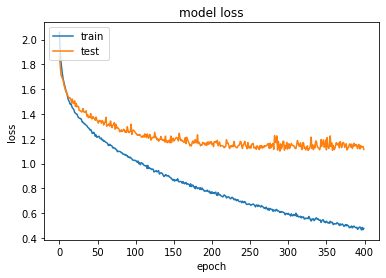

In [78]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving the model


In [76]:
model_name = 'Speech_Model.h5'
save_dir = os.path.join(os.getcwd(), 'Trained_Models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\shatrohan\Desktop\ML PROJECT\SAMPLE PROJ 3\Codes\Trained_Models\Speech_Model.h5 


In [77]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Loading the model


In [32]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./Trained_Models/Speech_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 57.62%


In [45]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# matrix = confusion_matrix(y_test,preds)
# print (matrix)
# print(classification_report(y_test,preds))

# Test Set Prediction
Predicting emotions on the test data

In [35]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

16/16 [==============================] - 0s 6ms/step


In [37]:
preds

array([[5.68364412e-02, 2.73819622e-02, 7.10077941e-01, ...,
        3.30783799e-02, 1.68970937e-03, 1.42651394e-01],
       [9.52965975e-01, 4.70016897e-03, 5.71097806e-03, ...,
        4.23036581e-05, 1.13739492e-02, 7.96782726e-04],
       [1.94054935e-02, 7.85365701e-01, 1.49978278e-02, ...,
        1.09858654e-01, 1.85214430e-02, 4.22790572e-02],
       ...,
       [1.48942387e-02, 3.37356031e-01, 6.10086024e-01, ...,
        2.09641876e-03, 7.79151393e-04, 2.57198606e-03],
       [2.22795680e-02, 8.03197036e-04, 2.44397238e-01, ...,
        5.02419643e-05, 3.86535615e-01, 8.14670420e-05],
       [2.50742529e-02, 1.57806814e-01, 3.74430157e-02, ...,
        4.01058840e-03, 2.38628243e-03, 7.31461167e-01]], dtype=float32)

In [39]:
preds1=preds.argmax(axis=1)

In [40]:
preds1

array([2, 0, 1, 3, 3, 0, 3, 5, 3, 5, 2, 6, 0, 4, 4, 3, 0, 5, 1, 5, 2, 6,
       3, 4, 0, 3, 0, 2, 3, 3, 3, 4, 5, 3, 0, 3, 2, 3, 2, 3, 5, 6, 1, 0,
       5, 1, 1, 5, 1, 5, 1, 3, 2, 2, 5, 5, 2, 0, 5, 4, 4, 0, 4, 0, 0, 3,
       1, 2, 0, 3, 3, 2, 6, 2, 4, 5, 3, 6, 0, 1, 5, 3, 0, 2, 3, 3, 3, 2,
       2, 2, 3, 0, 4, 2, 2, 3, 6, 5, 4, 2, 0, 4, 3, 4, 3, 5, 5, 3, 3, 3,
       2, 3, 0, 3, 4, 5, 5, 5, 5, 0, 2, 3, 6, 0, 0, 3, 2, 2, 5, 0, 1, 3,
       1, 3, 4, 0, 3, 0, 1, 6, 0, 0, 1, 2, 0, 0, 1, 3, 4, 2, 5, 1, 4, 0,
       5, 2, 1, 2, 6, 1, 0, 5, 5, 5, 0, 3, 4, 4, 3, 6, 6, 5, 1, 4, 1, 1,
       2, 1, 2, 5, 0, 0, 4, 6, 0, 2, 2, 2, 1, 0, 3, 0, 4, 0, 4, 1, 0, 6,
       2, 0, 0, 2, 4, 4, 6, 3, 4, 6, 0, 4, 3, 3, 2, 2, 1, 1, 4, 6, 3, 4,
       5, 0, 0, 3, 4, 4, 1, 5, 3, 1, 5, 4, 4, 4, 0, 3, 1, 5, 1, 6, 6, 5,
       5, 2, 4, 5, 5, 6, 1, 0, 6, 4, 0, 5, 0, 1, 1, 1, 1, 1, 3, 3, 1, 4,
       0, 6, 5, 6, 2, 2, 5, 4, 2, 1, 4, 3, 2, 3, 0, 0, 2, 0, 5, 0, 3, 5,
       3, 4, 5, 1, 5, 3, 4, 6, 5, 0, 2, 5, 1, 0, 5,

In [85]:
abc = preds1.astype(int).flatten()

In [86]:
predictions = (lb.inverse_transform((abc)))

In [87]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,2
1,0
2,1
3,3
4,3
5,0
6,3
7,5
8,3
9,5


In [88]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [89]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,2
1,0
2,1
3,2
4,3
5,6
6,6
7,5
8,3
9,5


In [90]:
finaldf = actualdf.join(preddf)

# Actual v/s Predicted emotions

In [91]:
finaldf[170:180]

,actualvalues,predictedvalues
170,6,6
171,1,5
172,1,1
173,4,4
174,3,1
175,1,1
176,6,2
177,0,1
178,2,2
179,5,5


In [92]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
0,88
1,58
2,80
3,93
4,57
5,89
6,47


In [93]:
finaldf.to_csv('Predictions.csv', index=False)

# Live Demonstration

In [107]:
import wave
import keras
import pyaudio
import pandas as pd
import numpy as np

import IPython.display as ipd


In [109]:
CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "demo_audio.wav"
emotions=["Anger","disgust","fear","happy","Neutral", "sad", "surprise"]

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


# Loading the Model¶

In [110]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('./utils/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./Trained_Models/Speech_Model.h5")
print("Loaded model from disk")

Loaded model from disk


In [112]:
demo_audio_path = 'demo_audio.wav'
ipd.Audio(demo_audio_path)

In [113]:
#from utils.feature_extraction import get_audio_features
demo_mfcc, demo_pitch, demo_mag, demo_chrom = get_audio_features(demo_audio_path,20000)

In [114]:
mfcc = pd.Series(demo_mfcc)
pit = pd.Series(demo_pitch)
mag = pd.Series(demo_mag)
C = pd.Series(demo_chrom)
demo_audio_features = pd.concat([mfcc,pit,mag,C],ignore_index=True)

In [115]:
demo_audio_features= np.expand_dims(demo_audio_features, axis=0)
demo_audio_features= np.expand_dims(demo_audio_features, axis=2)

In [116]:
demo_audio_features.shape

(1, 65, 1)

In [117]:
livepreds = loaded_model.predict(demo_audio_features, batch_size=32, verbose=1)

1/1 [==============================] - 0s 0s/step


In [124]:
livepreds

array([[0.01008993, 0.13668768, 0.01917549, 0.00328436, 0.0137027 ,
        0.8158395 , 0.0012203 ]], dtype=float32)

In [125]:
#emotions=["anger","disgust","fear","happy","neutral", "depressed", "surprise"]
index = livepreds.argmax(axis=1).item()
index

5

In [126]:
emotions[index]


'depressed'